In [1]:
%matplotlib inline

In [2]:
%run -n VehicleDetection.py

In [3]:
vehicleDetection = VehicleDetection(test_images = 'test_images/*.jpg',
                                    # Color space parameters
                                    color_space_type = 'HLS',
                                    color_space_size = (32, 32),
                                    # Define HOG parameters
                                    hog_orient = 9,
                                    hog_pix_per_cell = 8,
                                    hog_cell_per_block = 2,                                    
                                    
                                    useHotMapping=False)

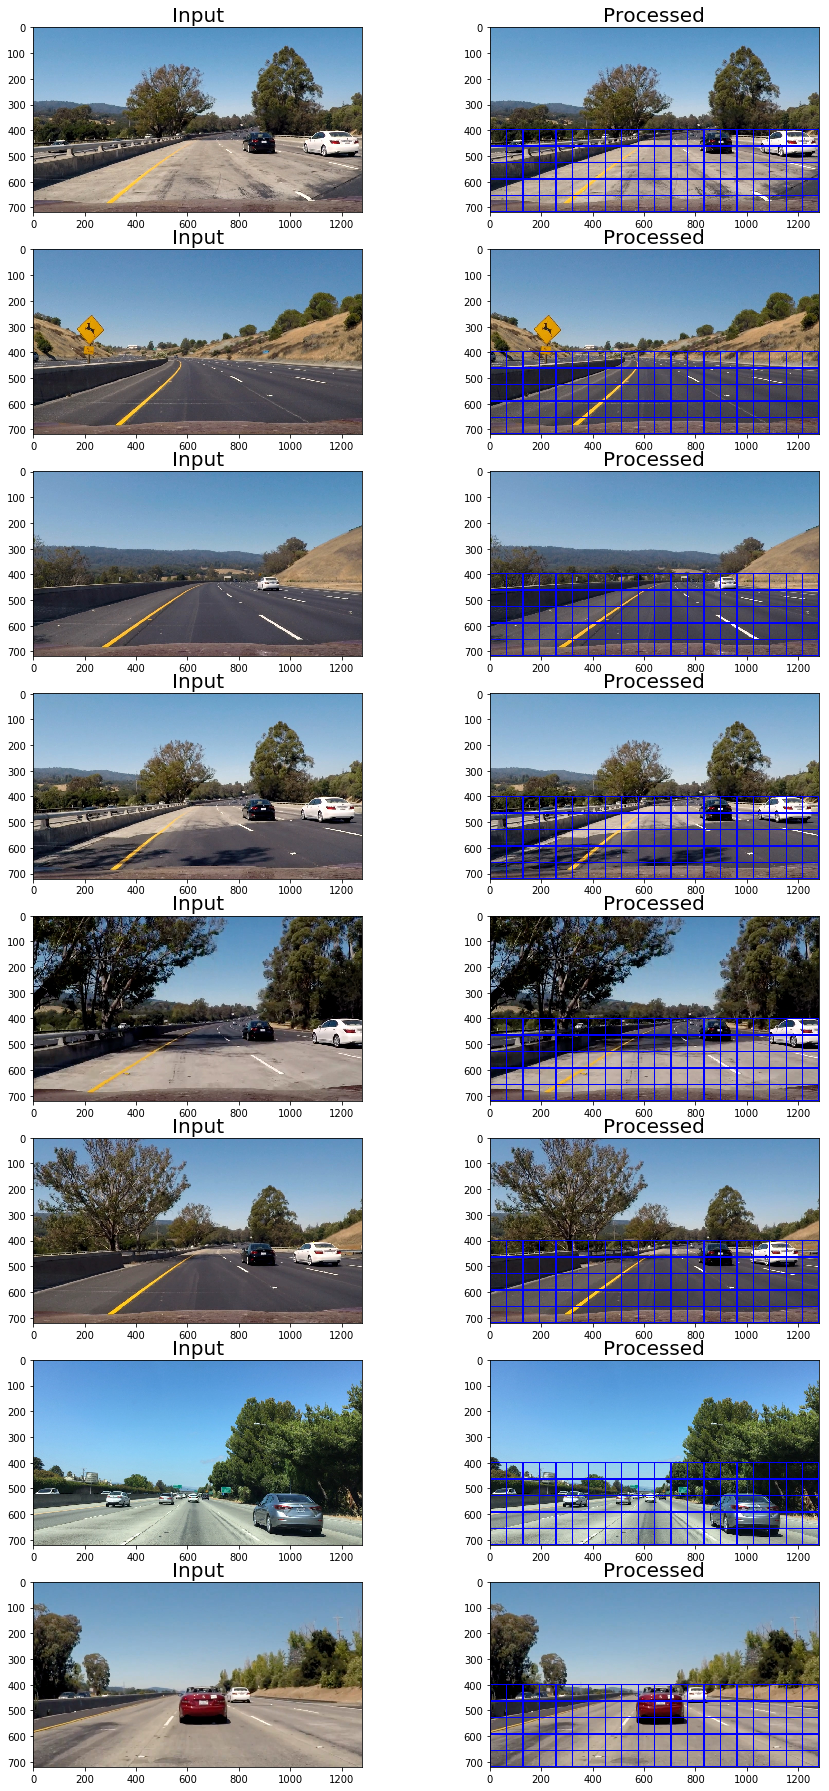

In [4]:
vehicleDetection.draw_test_images_pipeline()